In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [167]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [168]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [169]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [170]:

matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [171]:
delivery.fillna(0, inplace = True)

In [172]:
matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [173]:
matches.replace(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'],
       ['RCB', 'KXIP', 'DD', 'MI', 'KKR', 'RR', 'DC', 'CSK', 
        'KTK', 'PW', 'SRH', 'GL', 'RPS', 'RPS', 'DC', 'PBKS', 
        'LSG', 'GT', 'RCB'], inplace=True)

delivery.replace(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'],
       ['RCB', 'KXIP', 'DD', 'MI', 'KKR', 'RR', 'DC', 'CSK', 
        'KTK', 'PW', 'SRH', 'GL', 'RPS', 'RPS', 'DC', 'PBKS', 
        'LSG', 'GT', 'RCB'], inplace=True)

## Basic Analysis

In [174]:
print("Total Matches Played", matches.shape[0])

print("Venues Played at:", matches['city'].unique())

print("Teams :", matches['team1'].unique())

Total Matches Played 1095
Venues Played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'
 'Navi Mumbai' 'Lucknow' 'Guwahati' 'Mohali']
Teams : ['RCB' 'KXIP' 'DD' 'MI' 'KKR' 'RR' 'DC' 'CSK' 'KTK' 'PW' 'SRH' 'GL' 'RPS'
 'PBKS' 'LSG' 'GT']


In [175]:
print("\nTotal Venues Played at:", matches['city'].nunique())

print("\nTotal Umpires:", matches['umpire1'].nunique())


Total Venues Played at: 36

Total Umpires: 62


In [176]:
print((matches['player_of_match'].value_counts()).idxmax(),":has the most number of man of the match awards")

print((matches['winner'].value_counts()).idxmax(),":has the highest number of match wins")

AB de Villiers :has the most number of man of the match awards
MI :has the highest number of match wins


In [177]:
df = matches.iloc[[matches['toss_winner'].idxmax()]]

df[['season', 'team1', 'team2', 'toss_winner', 'winner']]

,season,team1,team2,toss_winner,winner
331,2013,RCB,SRH,SRH,RCB


### Toss Decision

In [178]:
matches['toss_decision'].value_counts().sum()

1095

In [179]:
print("Toss Decision in %\n", ((matches['toss_decision']).value_counts(normalize = True))* 100)

Toss Decision in %
 toss_decision
field    64.292237
bat      35.707763
Name: proportion, dtype: float64


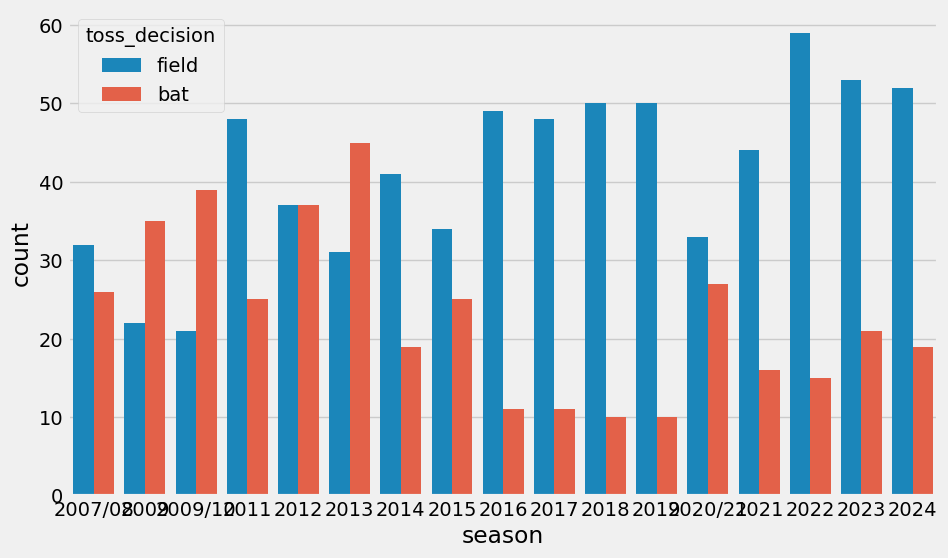

In [180]:
mlt.subplots(figsize = (10, 6))
sns.countplot(x = 'season', hue = 'toss_decision', data = matches)
mlt.show()

# Max toss winner

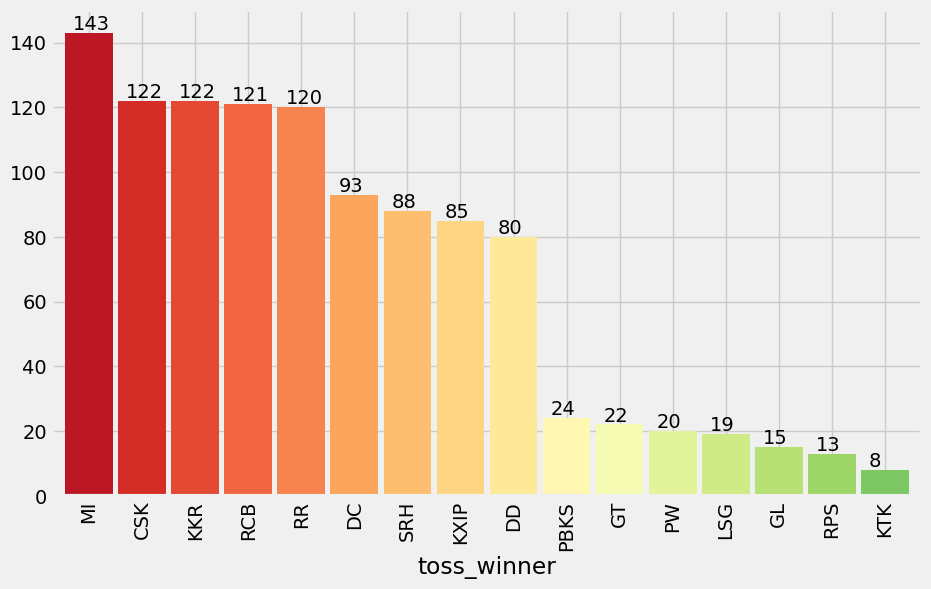

In [181]:
mlt.subplots(figsize = (10, 6))
ax = matches['toss_winner'].value_counts().plot.bar(width = 0.9, color = sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 1))
mlt.show()

### Total Matches vs Wins for Teams

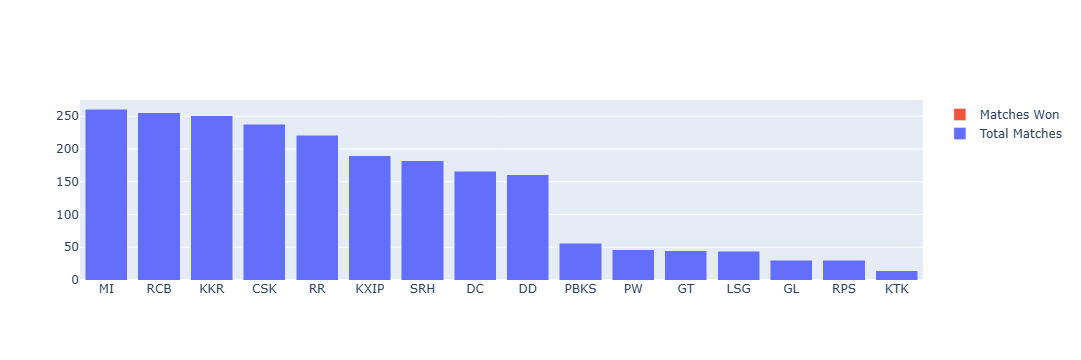

In [182]:
matches_played_byteams = pd.concat([matches['team1'], matches['team2']])

matches_played_byteams = matches_played_byteams.value_counts().reset_index()

matches_played_byteams.columns = ['Team', 'Total Matches']

matches_played_byteams['wins'] = matches['winner'].value_counts().reset_index()['winner']

matches_played_byteams.set_index("Team", inplace = True)

trace1 = go.Bar(
    x = matches_played_byteams.index,
    y = matches_played_byteams['Total Matches'],
    name = 'Total Matches'
)

trace2 = go.Bar(
    x = matches_played_byteams.index,
    y = matches_played_byteams['wins'],
    name = 'Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode = 'stack'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'stacked-bar')

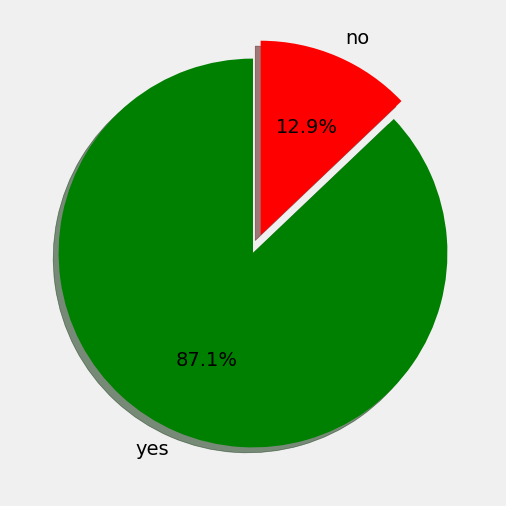

In [183]:
df = matches[matches['toss_winner'] == matches['winner']]

slices = [len(df), (636 - len(df))]

labels = ['yes', 'no']

mlt.pie(slices, labels = labels,
        startangle = 90,
        shadow = True,
       explode = (0, 0.1),
        autopct = "%1.1f%%",
        colors = ['g', 'r'])

fig = mlt.gcf()

fig.set_size_inches(6, 6)

mlt.show()

### Matches played across each season

C:\Users\reign\AppData\Local\Temp\ipykernel_2268\3383703.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\reign\AppData\Local\Temp\ipykernel_2268\3383703.py:3: UserWarning:


The palette list has fewer values (6) than needed (17) and will cycle, which may produce an uninterpretable plot.



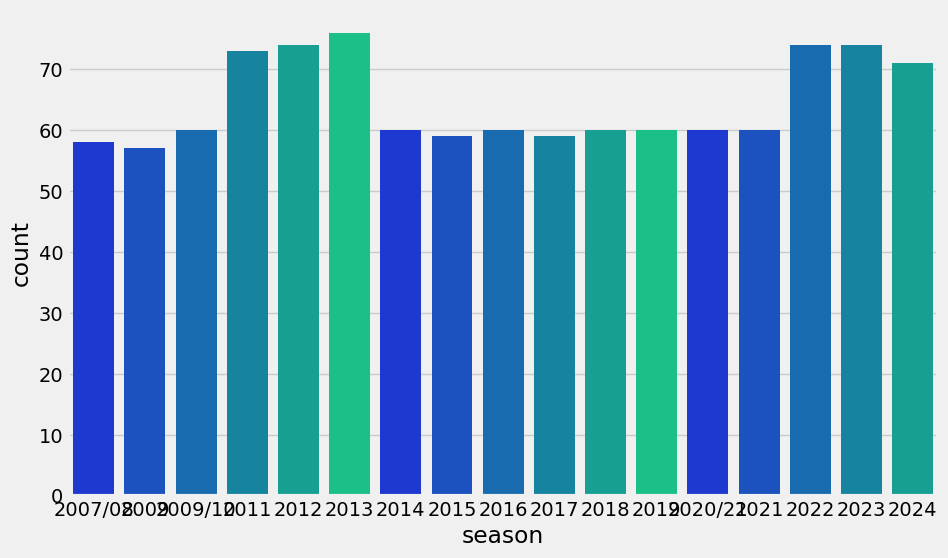

In [184]:
mlt.subplots(figsize = (10, 6))

sns.countplot(x = 'season', data = matches, palette = sns.color_palette("winter"))

mlt.show()

#### Runs across the Seasons

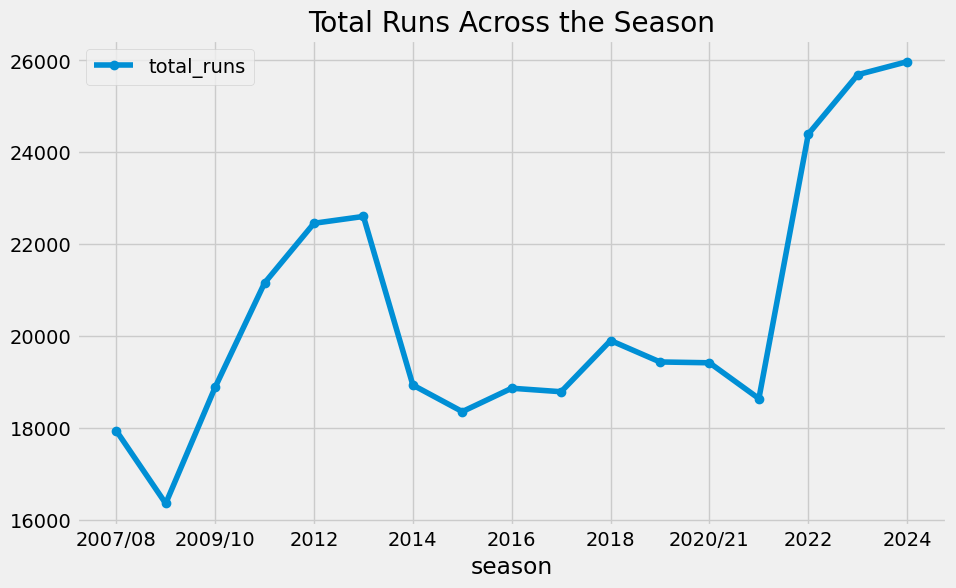

In [185]:
batsmen = matches[['id', 'season']].merge(delivery,
                                          left_on = 'id',
                                          right_on = 'match_id',
                                          how = 'left').drop('id', axis = 1)

season = batsmen.groupby(['season'])['total_runs'].sum().reset_index()

season.set_index("season").plot(marker = 'o')

mlt.gcf().set_size_inches(10, 6)

mlt.title("Total Runs Across the Season")

mlt.show()

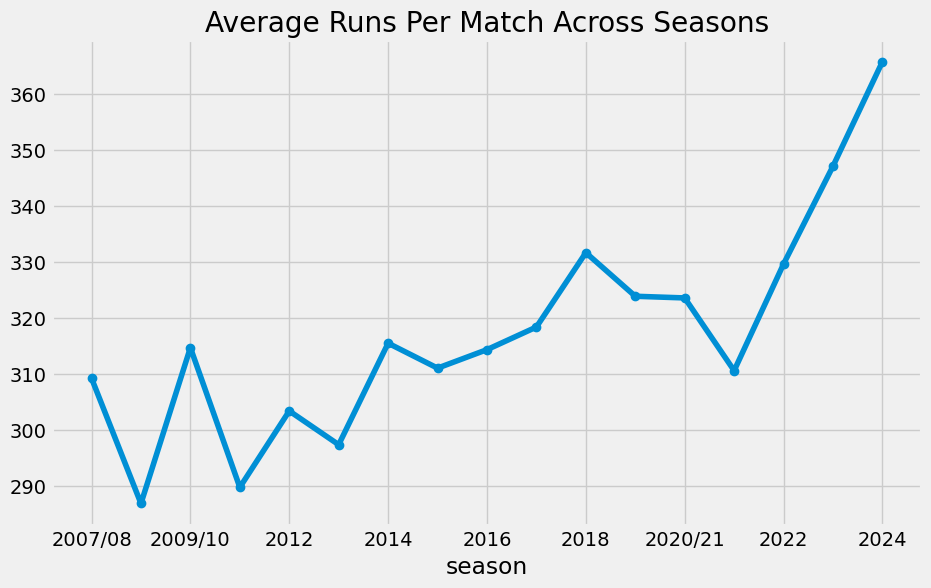

In [186]:
avgruns_each_season = matches.groupby(['season']).count().id.reset_index()

avgruns_each_season.rename(columns = {'id': 'matches'}, inplace = True)

avgruns_each_season['total_runs'] = season['total_runs']

avgruns_each_season['average_runs_per_match'] = avgruns_each_season['total_runs'] / avgruns_each_season['matches']

avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker = 'o')

mlt.gcf().set_size_inches(10, 6)

mlt.title('Average Runs Per Match Across Seasons')

mlt.show()

## Sixes and Fours Across the Season

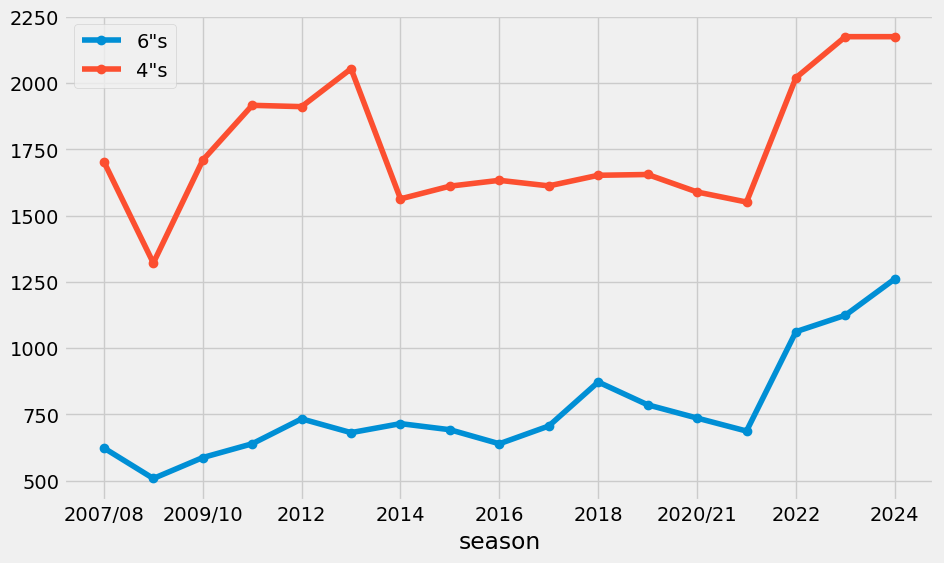

In [187]:
Season_boundaries = batsmen.groupby("season")['batsman_runs'].agg(lambda x: (x == 6).sum()).reset_index()

a = batsmen.groupby("season")['batsman_runs'].agg(lambda x: (x == 4).sum()).reset_index()

Season_boundaries = Season_boundaries.merge(a, left_on = 'season', right_on = 'season', how = 'left')

Season_boundaries = Season_boundaries.rename(columns = {'batsman_runs_x': '6"s', 'batsman_runs_y': '4"s'})

Season_boundaries.set_index('season')[['6"s', '4"s']].plot(marker = 'o')

fig = mlt.gcf()

fig.set_size_inches(10, 6)

mlt.show()

### Runs per over by teams across seasons

C:\Users\reign\AppData\Local\Temp\ipykernel_2268\1531771430.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



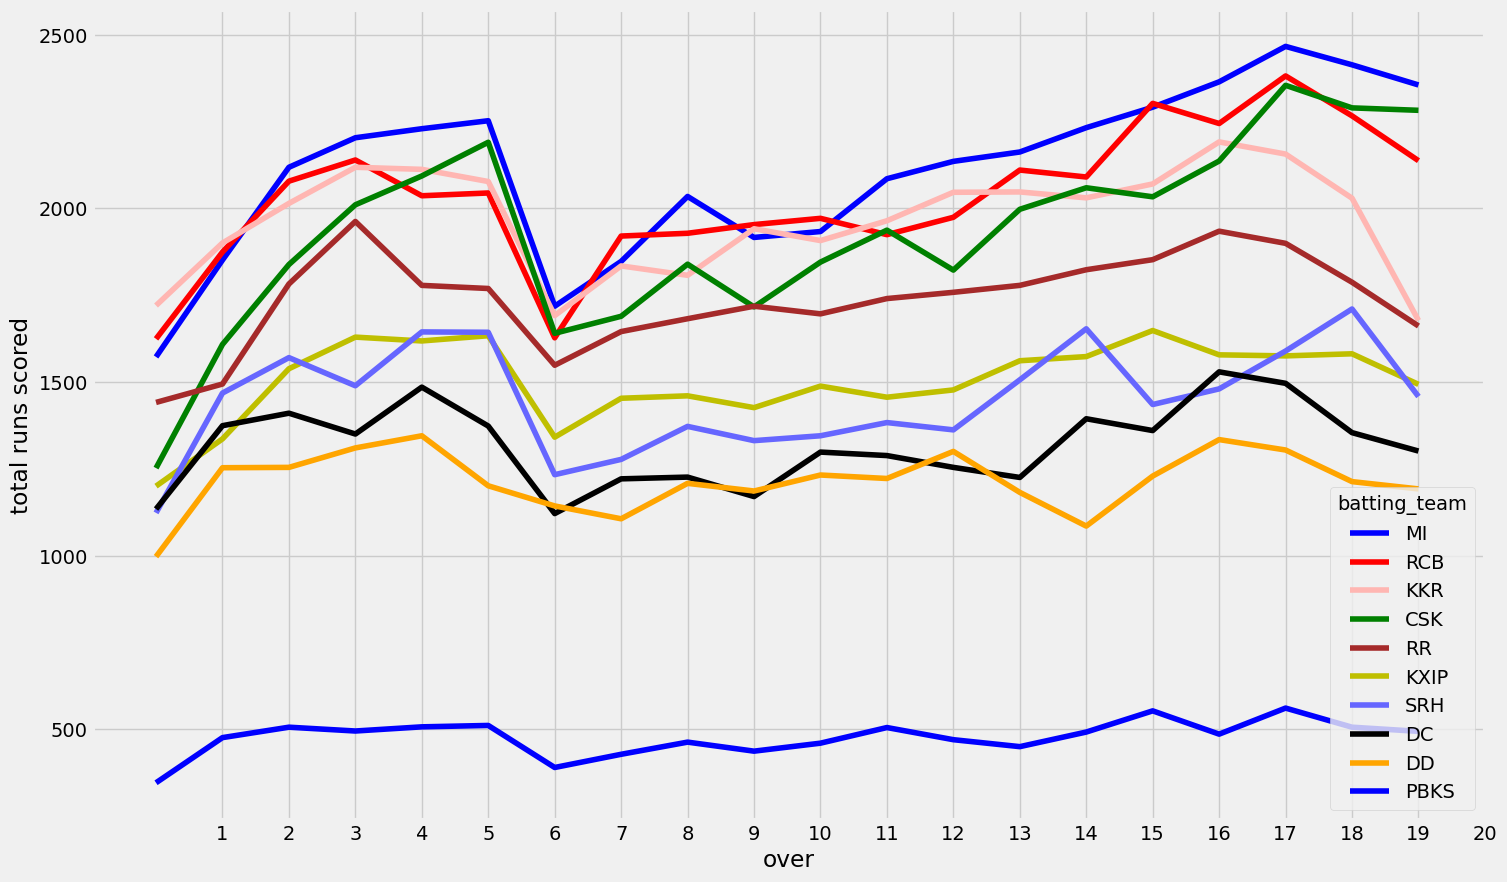

In [188]:
runs_per_over = delivery.pivot_table(index = ['over'], columns = 'batting_team',
                                     values = 'total_runs',
                                    aggfunc = sum)

runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches'] > 50].index)].plot(color = ['b', 'r', "#Ffb6b2", "g", 'brown', 'y', '#6666ff', 'black', '#FFA500'])

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

mlt.xticks(x)

mlt.ylabel('total runs scored')

fig = mlt.gcf()

fig.set_size_inches(16, 10)

mlt.show()

### Favourite Grounds

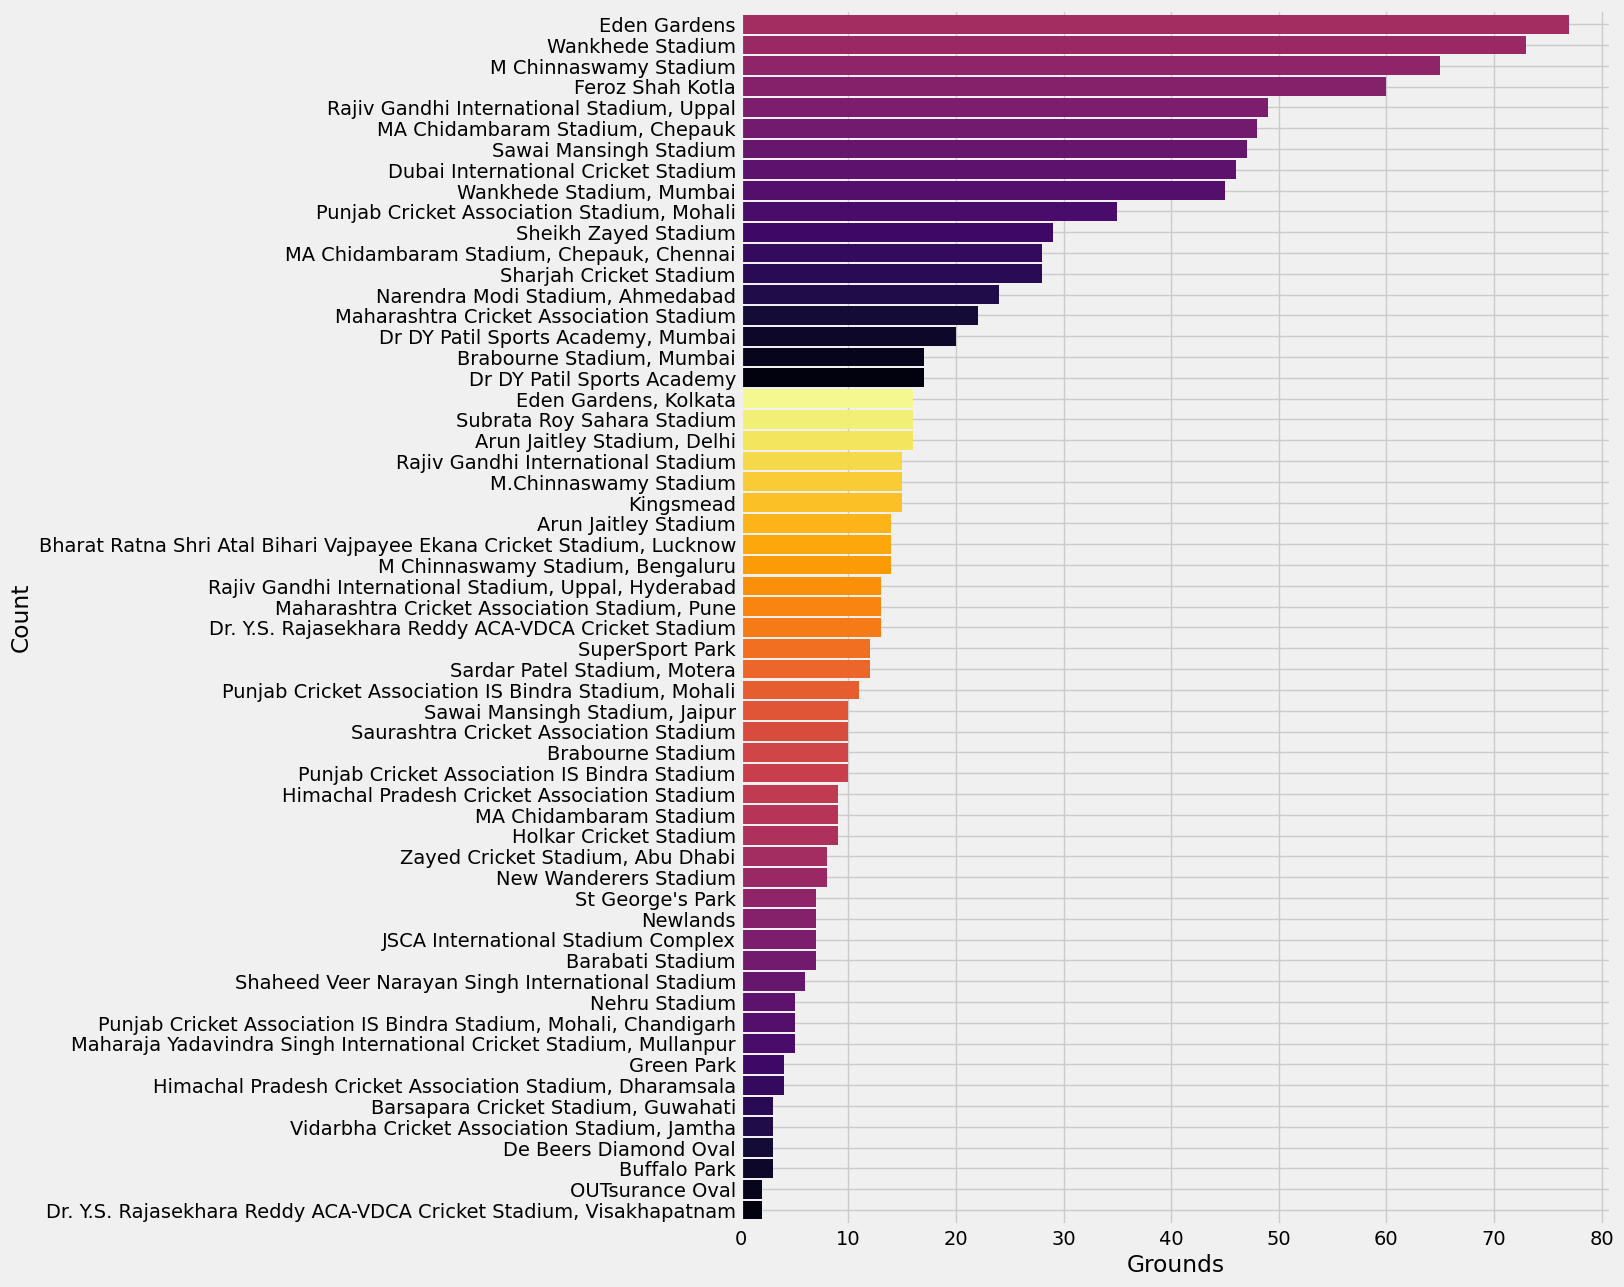

In [189]:
mlt.subplots(figsize = (10, 15))

ax = matches['venue'].value_counts().sort_values(ascending = True).plot.barh(width = 0.9, color = sns.color_palette('inferno', 40))

ax.set_xlabel('Grounds')

ax.set_ylabel('Count')

mlt.show()
                                                                        

### Maximum Man of the Matches

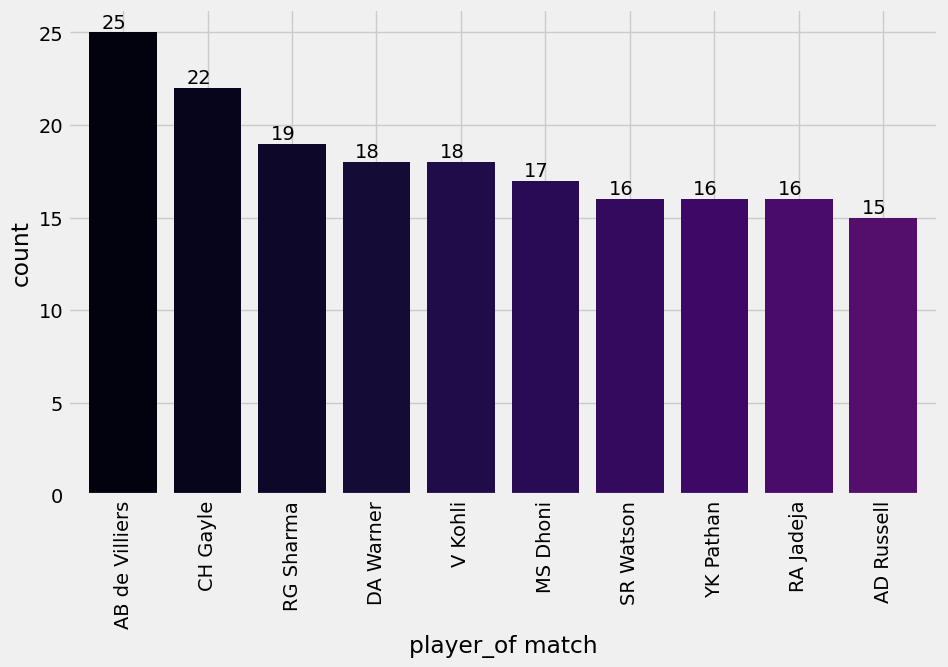

In [190]:
mlt.subplots(figsize = (10, 6))

ax = matches['player_of_match'].value_counts().head(10).plot.bar(width = 0.8, color = sns.color_palette('inferno', 40))

ax.set_xlabel('player_of match')

ax.set_ylabel('count')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.25))

mlt.show()

### Winner by Years

In [191]:
print("Winner By Years")

# Group by season and take the last match of each season
winners = matches.groupby('season').tail(1)

# Select season and winner columns
for i, row in winners.iterrows():
    print(f"{row['season']} → {row['winner']}")


Winner By Years
2007/08 → RR
2009 → DC
2009/10 → CSK
2011 → CSK
2012 → KKR
2013 → MI
2014 → KKR
2015 → MI
2016 → SRH
2017 → MI
2018 → CSK
2019 → MI
2020/21 → MI
2021 → CSK
2022 → GT
2023 → CSK
2024 → KKR


### Super Over

In [192]:
print(matches.columns.tolist())

print("\n Total Matches with Super Overs:", matches[matches['super_over'] == 1]['id'].nunique())

print("\n Total Matches with Super Overs:", matches[matches['super_over'] == 1].shape[0])

['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2']

 Total Matches with Super Overs: 0

 Total Matches with Super Overs: 0


In [193]:
teams =  ['RCB', 'KXIP', 'DD', 'MI', 'KKR', 'RR', 'DC', 'CSK', 
        'KTK', 'PW', 'SRH', 'GL', 'RPS', 'RPS', 'DC', 'PBKS', 
        'LSG', 'GT', 'RCB']

play = matches[matches['super_over'] == 1]['team1'].unique()
play - list(play)

print("Teams who hven't ever played a super overs are:", list(set(teams) - set(play)))

Teams who hven't ever played a super overs are: ['DD', 'PW', 'LSG', 'SRH', 'DC', 'GT', 'MI', 'CSK', 'KXIP', 'RCB', 'PBKS', 'KTK', 'KKR', 'RR', 'GL', 'RPS']


In [194]:
teams =  ['RCB', 'KXIP', 'DD', 'MI', 'KKR', 'RR', 'DC', 'CSK', 
        'KTK', 'PW', 'SRH', 'GL', 'RPS', 'RPS', 'DC', 'PBKS', 
        'LSG', 'GT', 'RCB']

play = matches[matches['super_over'] == 1]['team1'].unique()  # Changed 'batting_team' to 'team1'

print("Teams who haven't ever played super overs are:", list(set(teams) - set(play)))

Teams who haven't ever played super overs are: ['DD', 'PW', 'LSG', 'SRH', 'DC', 'GT', 'MI', 'CSK', 'KXIP', 'RCB', 'PBKS', 'KTK', 'KKR', 'RR', 'GL', 'RPS']


#### Favourite Umpire

NameError: name 'get_x' is not defined

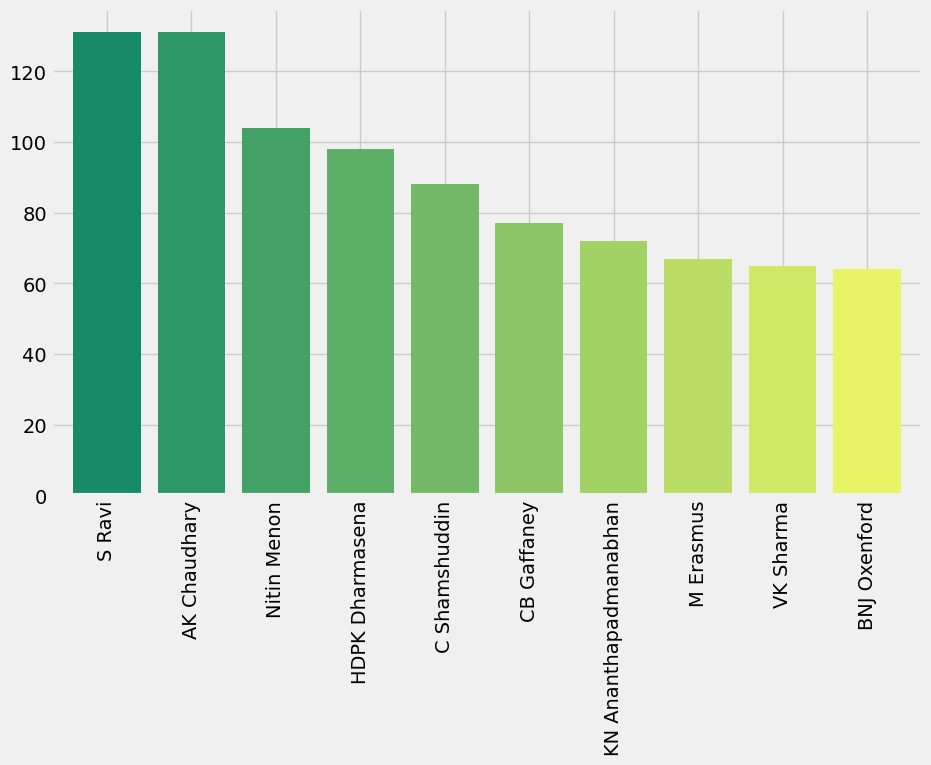

In [195]:
mlt.subplots(figsize = (10, 6))
ump = pd.concat([matches['umpire1'], matches['umpire2']])

ax = mlt.gca()
ump.value_counts().head(10).plot.bar(width = 0.8, color = sns.color_palette('summer', 10))

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p,get_x() + 0.15, p.get_height() + 0.25))

mlt.show()

### Team 1 vs Team 2

In [196]:
def team1_vs_team2(team1, team2):
    mt1 = matches[((matches['team1'] == team1) | (matches['team2'] == team1)) & ((matches['team1'] == team2))]
    sns.countplot(x = 'season', hue = 'winner', data = mt1, palette = 'winter')
    mlt.xticks(rotation = 'vertical')
    leg = mlt.legend(loc = 'upper center')
    fig = mlt.gcf()
    fig.set_size_inches(10, 6)
    mlt.show

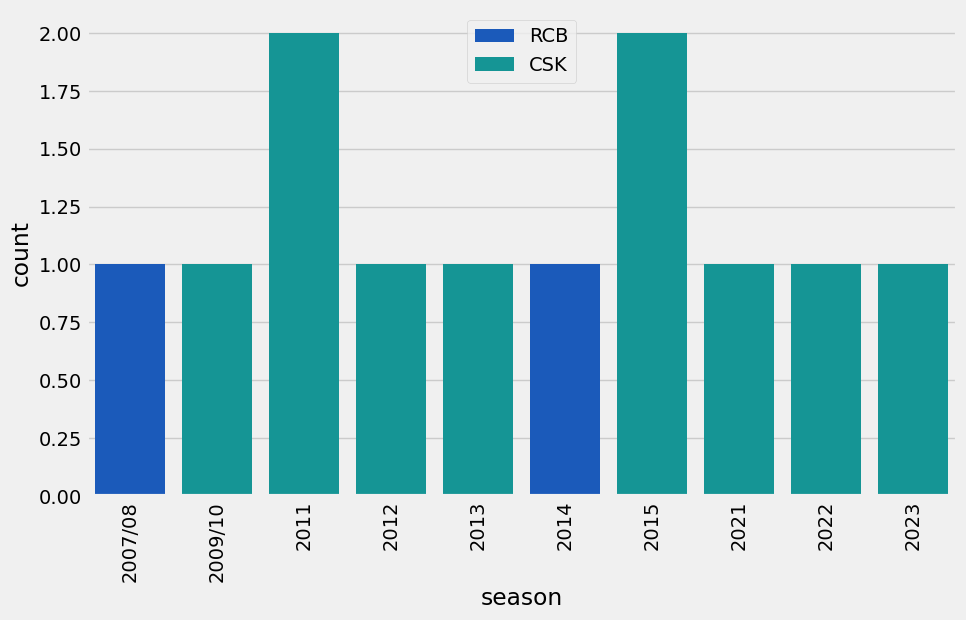

In [197]:
team1_vs_team2('RCB', 'CSK')

### Score Distribution For Teams by Innings

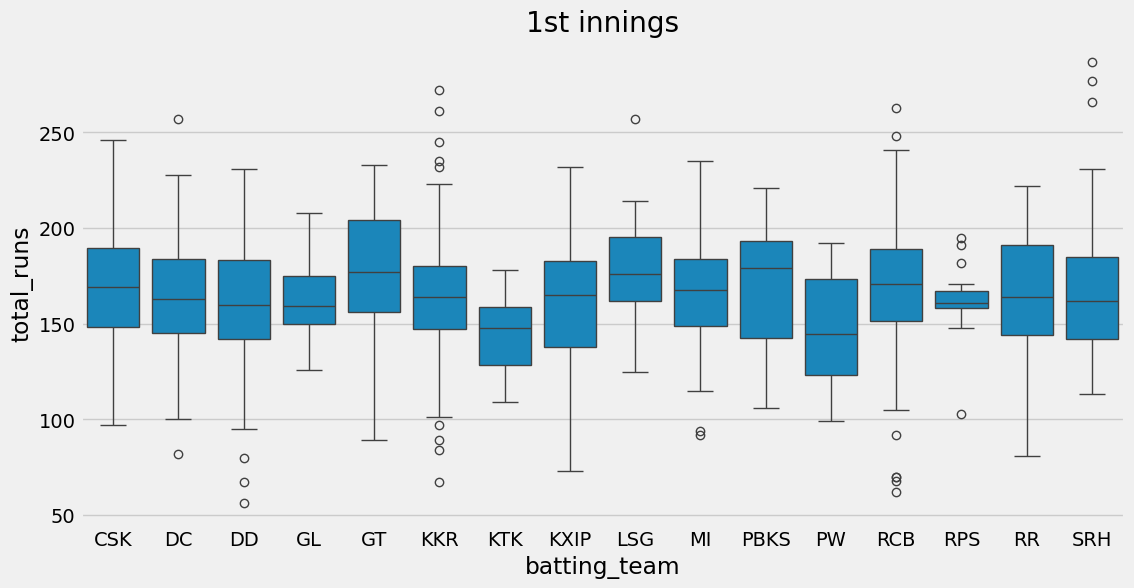

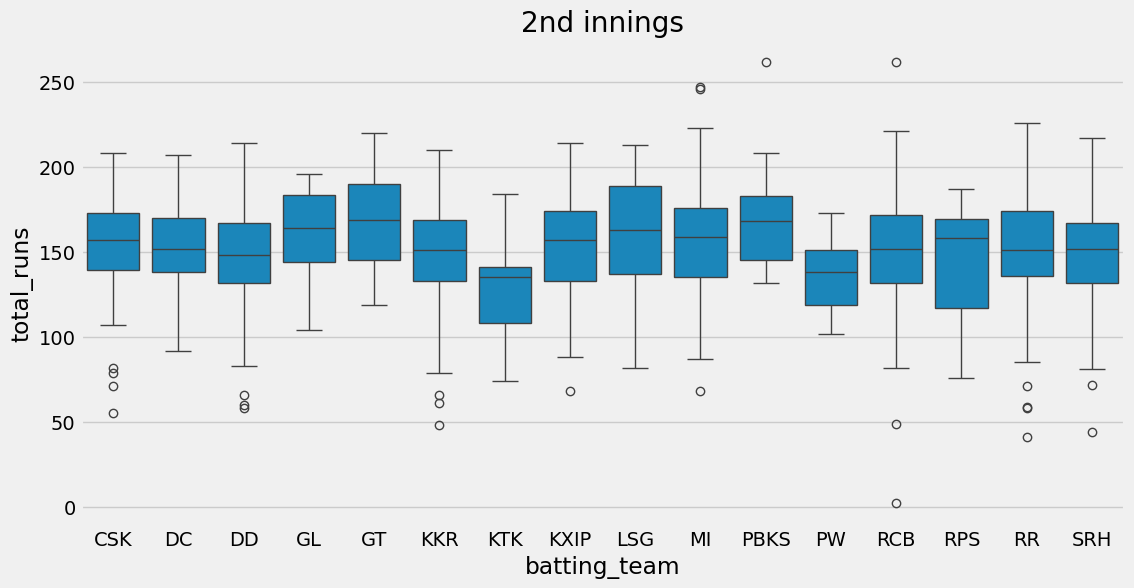

In [198]:
mlt.subplots(figsize = (12, 6))

xyz = delivery.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

xyz.drop('match_id', axis = 1, inplace = True)

xyz = xyz.sort_values(by = ['batting_team', 'total_runs'], ascending = True)

score_1_inning = xyz[xyz['inning'] == 1]

score_2_inning = xyz[xyz['inning'] == 2]

sns.boxplot(x = 'batting_team', y = 'total_runs', data = score_1_inning).set_title("1st innings")

mlt.show()

sns.boxplot(x = 'batting_team', y = 'total_runs', data = score_2_inning).set_title("2nd innings")

fig = mlt.gcf()

fig.set_size_inches(12, 6)

### 200+ Scores

In [199]:
high_scores = delivery.groupby(['match_id', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()

high_scores = high_scores[high_scores['total_runs'] >= 200]

high_scores.nlargest(10, 'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
2133,1426268,1,SRH,RCB,287
2089,1422126,1,SRH,MI,277
2105,1422134,1,KKR,DC,272
2143,1426273,1,SRH,DC,266
709,598027,1,RCB,PW,263
2134,1426268,2,RCB,SRH,262
2158,1426280,2,PBKS,KKR,262
2157,1426280,1,KKR,PBKS,261
2002,1359512,1,LSG,PBKS,257
2159,1426281,1,DC,MI,257


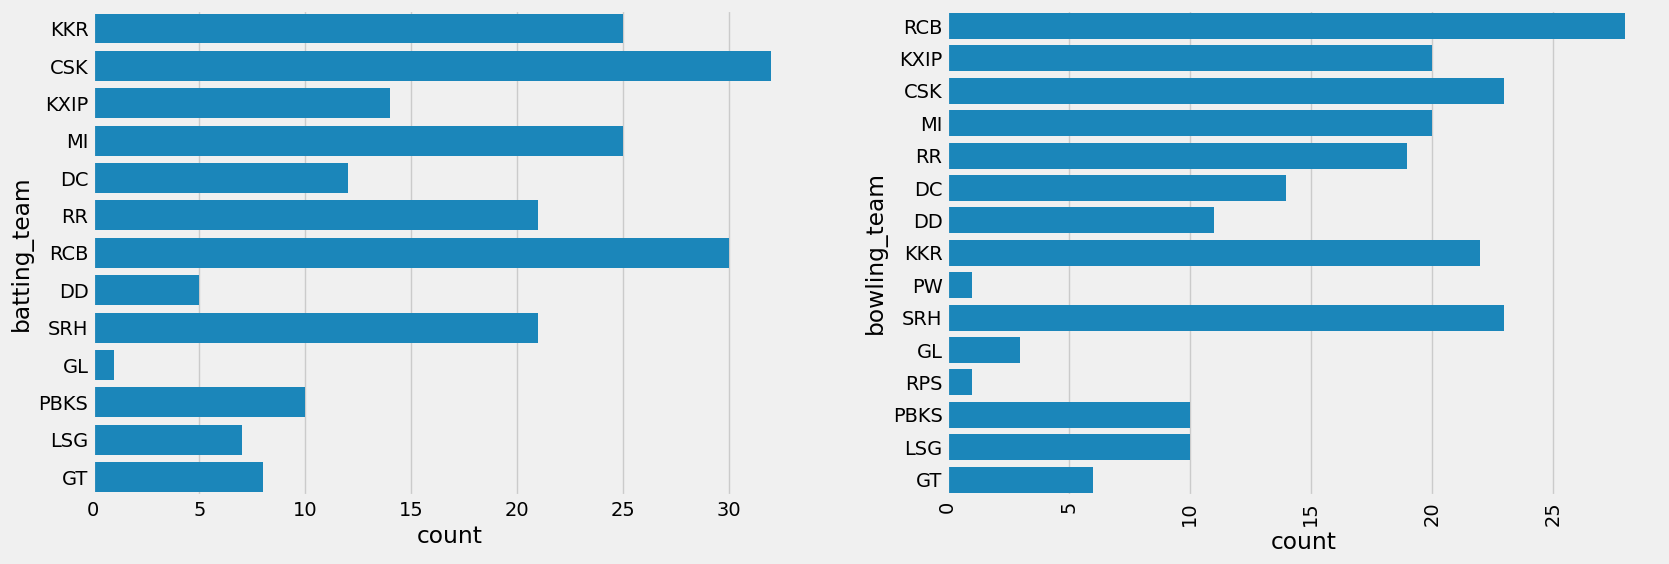

In [200]:
fig, ax = mlt.subplots(1, 2)

sns.countplot(high_scores['batting_team'], ax = ax[0])

sns.countplot(high_scores['bowling_team'], ax = ax[1])

mlt.xticks(rotation = 90)

fig = mlt.gcf()

fig.set_size_inches(18, 6)

mlt.show()

In [201]:
print("Teams who have not ever scored 200+ runs :", list(set(teams) - set(high_scores['batting_team'])))

print("Teams who have not ever conceeded 200+ runs :", list(set(teams) - set(high_scores['bowling_team'])))



Teams who have not ever scored 200+ runs : ['KTK', 'PW', 'RPS']
Teams who have not ever conceeded 200+ runs : ['KTK']


In [202]:
high = delivery.groupby(['match_id', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()

high.set_index(['match_id'], inplace = True)

high['total_runs'].max()

high = high.rename(columns = {'total_runs': 'count'})

high = high[high['count'] >= 200].groupby(['inning', 'batting_team', 'bowling_team']).count()

high

count
inning batting_team bowling_team       
1      CSK          DC                2
                    DD                2
                    GT                1
                    KKR               3
                    KXIP              2
...                                 ...
2      RR           SRH               1
       SRH          KKR               1
                    PBKS              1
                    RCB               1
                    RR                2

[132 rows x 1 columns]

#### Chances of Chasing 200+ Target

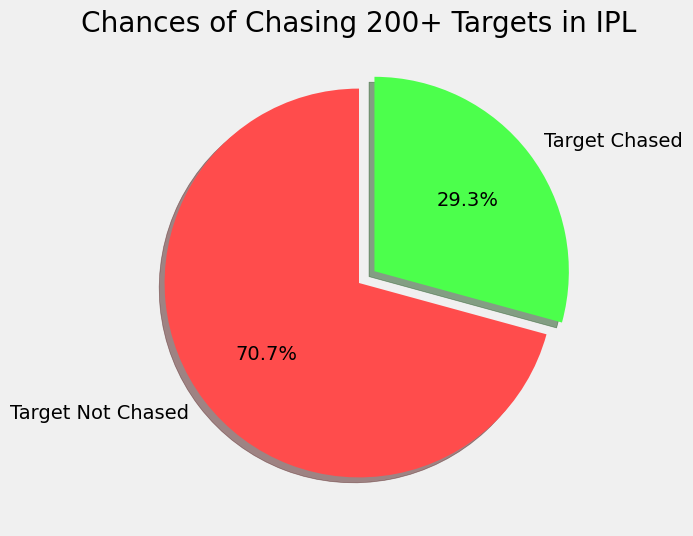

Chasing success rate for 200+ targets: 29.25%


In [204]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

first_innings = deliveries[deliveries['inning'] == 1].groupby('match_id')['total_runs'].sum().reset_index()

match_scores = matches.merge(first_innings, left_on='id', right_on='match_id')
match_scores.rename(columns={'total_runs':'first_innings_score'}, inplace=True)

target_matches = match_scores[match_scores['first_innings_score'] >= 200].copy()

target_matches.loc[:, 'is_chased'] = target_matches.apply(
    lambda x: 1 if x['winner'] == x['team2'] else 0, axis=1
)

slices = target_matches['is_chased'].value_counts()

labels = ['Target Not Chased', 'Target Chased']

mlt.pie(
    slices,
    labels=labels,
    colors=['#ff4c4c', '#4cff4c'],
    startangle=90,
    shadow=True,
    explode=(0, 0.1),
    autopct='%1.1f%%'
)

fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.title("Chances of Chasing 200+ Targets in IPL")
mlt.show()

success_rate = (target_matches['is_chased'].sum() / len(target_matches)) * 100
print(f"Chasing success rate for 200+ targets: {success_rate:.2f}%")


### Batsman Comparator

In [205]:
balls = delivery.groupby('batter')['ball'].count().reset_index()

In [206]:
runs = delivery.groupby(['batter'])['batsman_runs'].sum().reset_index()

In [207]:
balls = balls.merge(runs, left_on='batter', right_on = 'batter', how='outer')

In [208]:
balls.rename({"ball": "ball_x", "batsman_runs": "ball_y"}, axis = 1, inplace = True)

In [209]:
fours = delivery.groupby('batter')['batsman_runs'].agg(lambda x: (x == 4).sum()).reset_index()

In [210]:
sixes = delivery.groupby('batter')['batsman_runs'].agg(lambda x: (x == 6).sum()).reset_index()

In [211]:
balls['strike_rate'] = balls['ball_y'] / balls['ball_x'] * 100

In [212]:
balls = balls.merge(sixes, left_on = 'batter', right_on = 'batter', how = 'outer')

In [213]:
balls = balls.merge(fours, left_on = 'batter', right_on = 'batter', how = 'outer')

In [214]:
compare = delivery.groupby(['match_id', 'batter', 'batting_team'])['batsman_runs'].sum().reset_index()

In [215]:
compare = compare.groupby(['batter','batting_team'])['batsman_runs'].max().reset_index()

In [216]:
balls = balls.merge(compare, left_on = 'batter', right_on = 'batter', how = 'outer')

In [217]:
balls.rename({
    'ball_x': 'Balls', 
    'ball_y': 'Runs', 
    'batsman_runs_x': "6's", 
    'batsman_runs_y': "4's", 
    'batting_team': 'Team', 
    'batsman_runs': 'Highest_score'
}, axis=1, inplace=True)


In [218]:
balls

,batter,Balls,Runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,15,16,DC,10
1,A Ashish Reddy,196,280,142.857143,15,16,SRH,36
2,A Badoni,505,634,125.544554,24,46,LSG,59
3,A Chandila,7,4,57.142857,0,0,RR,4
4,A Chopra,75,53,70.666667,0,7,KKR,24
...,...,...,...,...,...,...,...,...
1271,Yuvraj Singh,2207,2754,124.784776,149,218,RCB,83
1272,Yuvraj Singh,2207,2754,124.784776,149,218,SRH,70
1273,Z Khan,141,117,82.978723,2,11,DD,4
1274,Z Khan,141,117,82.978723,2,11,MI,23


In [219]:

def batsman_comparator(stat1, stat2, batsman1, batsman2):
    sns.FacetGrid(balls, hue='Team', height=5).map(plt.scatter, stat1, stat2, alpha=0.5).add_legend()

    bats1 = balls[balls['batter'].str.contains(batsman1, case=False)].sort_values(by=stat1, ascending=False)
    bats2 = balls[balls['batter'].str.contains(batsman2, case=False)].sort_values(by=stat1, ascending=False)

    mlt.scatter(bats1[stat1], bats1[stat2], s=75, c='#55ff33')
    mlt.text(x=bats1[stat1].values[0], y=bats1[stat2].values[0], s=batsman1,
             fontsize=10, weight='bold', color='#f46d43')

    mlt.scatter(bats2[stat1], bats2[stat2], s=75, c='#f73545')
    mlt.text(x=bats2[stat1].values[0], y=bats2[stat2].values[0]+1, s=batsman2,
             fontsize=10, weight='bold', color='#ff58fd')

    mlt.gcf().set_size_inches(15, 10)
    mlt.title('Batsman Comparator', size=25)
    mlt.show()

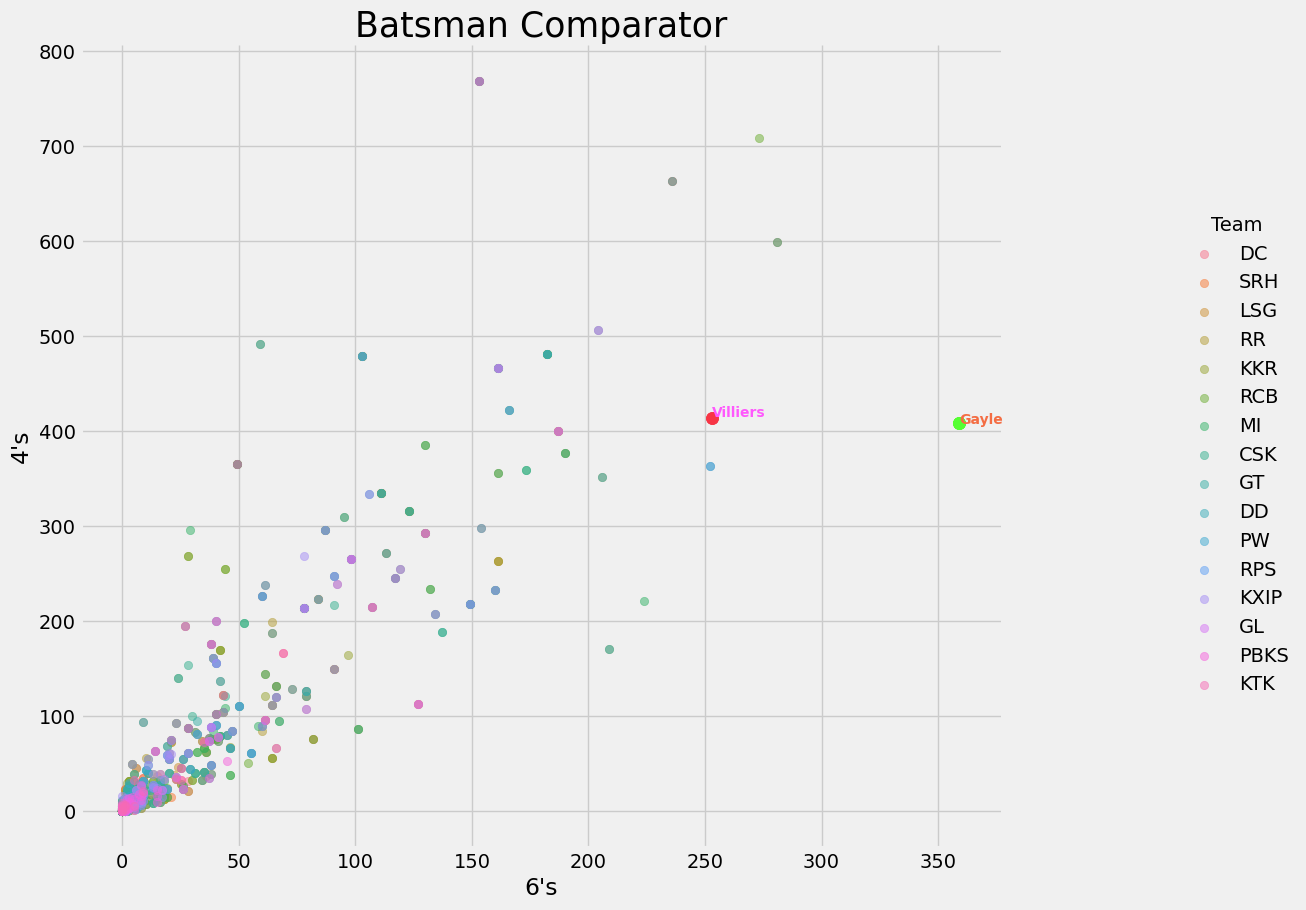

In [220]:
batsman_comparator("6's", "4's", "Gayle", "Villiers")

In [221]:
deliveries = pd.read_csv("deliveries.csv")

batsman_stats = deliveries.groupby("batter").agg({
    "batsman_runs": "sum",  
    "ball": "count"             
}).reset_index()

batsman_stats["strike_rate"] = (batsman_stats["batsman_runs"] / batsman_stats["ball"]) * 100

fours = deliveries[deliveries["batsman_runs"] == 4].groupby("batter")["batsman_runs"].count()
sixes = deliveries[deliveries["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count()

batsman_stats["4s"] = batsman_stats["batter"].map(fours).fillna(0).astype(int)
batsman_stats["6s"] = batsman_stats["batter"].map(sixes).fillna(0).astype(int)

batsman_stats.rename(columns={"batsman_runs": "runs"}, inplace=True)

print(batsman_stats.head())


           batter  runs  ball  strike_rate  4s  6s
0  A Ashish Reddy   280   196   142.857143  16  15
1        A Badoni   634   505   125.544554  46  24
2      A Chandila     4     7    57.142857   0   0
3        A Chopra    53    75    70.666667   7   0
4     A Choudhary    25    20   125.000000   1   1


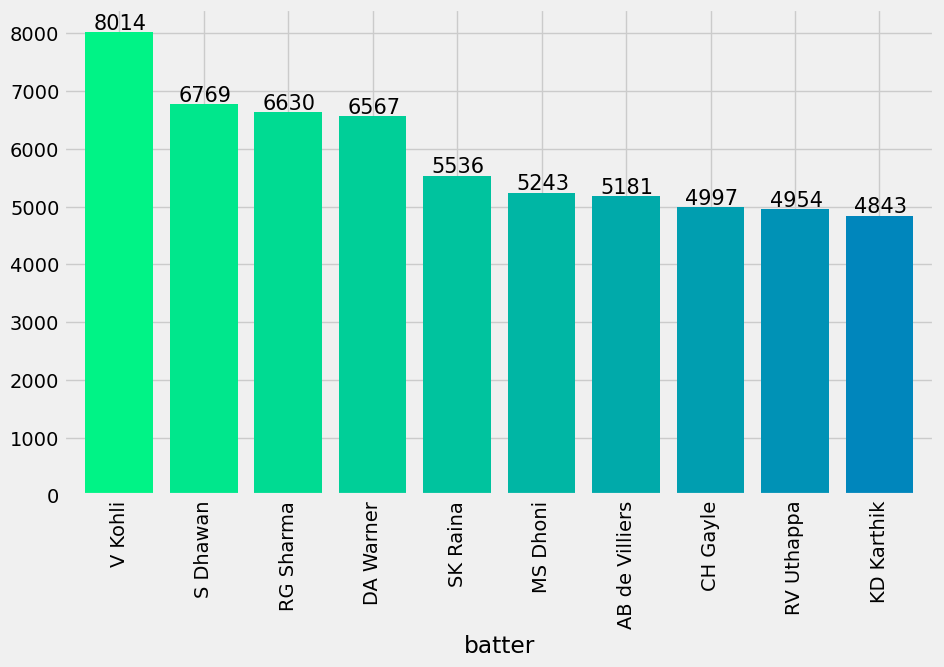

In [222]:
mlt.subplots(figsize = (10, 6))

max_runs = delivery.groupby(['batter'])['batsman_runs'].sum()

ax = max_runs.sort_values(ascending = False)[:10].plot.bar(width = 0.8, color = sns.color_palette("winter_r", 20))

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50), fontsize = 15)

mlt.show()

# Top Batsman's with 1's, 2's, 3's, 4's

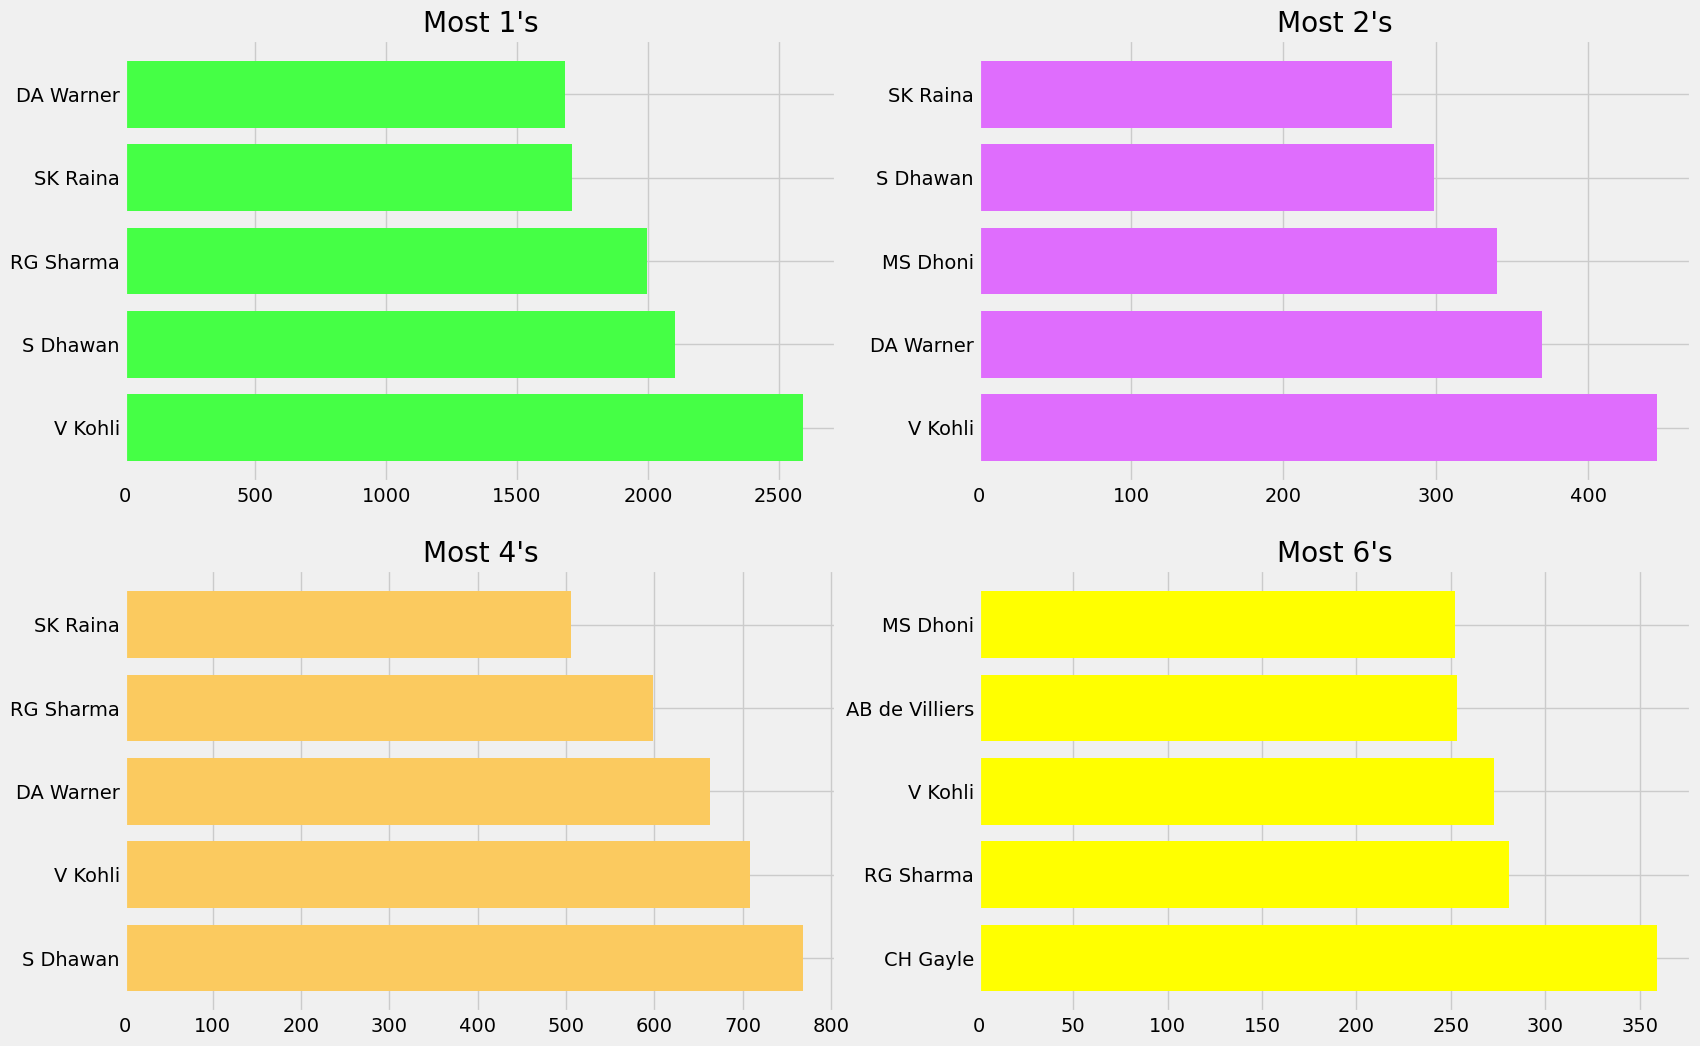

In [223]:
toppers = delivery.groupby(['batter', 'batsman_runs'])['total_runs'].count().reset_index()

toppers = toppers.pivot_table(index = "batter", columns = "batsman_runs", values = "total_runs", fill_value = 0)

fig, ax = mlt.subplots(2, 2, figsize = (18, 12))

toppers[1].sort_values(ascending = False)[:5].plot(kind = 'barh', ax = ax[0, 0], color = "#45ff45", width = 0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel("")

toppers[2].sort_values(ascending = False)[:5].plot(kind = 'barh', ax = ax[0, 1], color = "#df6dfd", width = 0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel("")

toppers[4].sort_values(ascending = False)[:5].plot(kind = 'barh', ax = ax[1, 0], color = "#fbca5f", width = 0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel("")

toppers[6].sort_values(ascending = False)[:5].plot(kind = 'barh', ax = ax[1, 1], color = "#ffff00", width = 0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel("")

mlt.show()

# Top Individual Scores

In [224]:
top_scores = delivery.groupby(['match_id', 'batter', 'batting_team'])['batsman_runs'].sum().reset_index()

top_scores.sort_values('batsman_runs', ascending = 0).head(10)

top_scores.nlargest(10, 'batsman_runs')

,match_id,batter,batting_team,batsman_runs
5302,598027,CH Gayle,RCB,175
2,335982,BB McCullum,KKR,158
14108,1304112,Q de Kock,LSG,140
7528,829795,AB de Villiers,RCB,133
11583,1216510,KL Rahul,KXIP,132
8359,980987,AB de Villiers,RCB,129
15383,1370352,Shubman Gill,GT,129
4687,548372,CH Gayle,RCB,128
10149,1136602,RR Pant,DD,128
2237,419137,M Vijay,CSK,127


# Individual Scores by Top Batsman each Inning

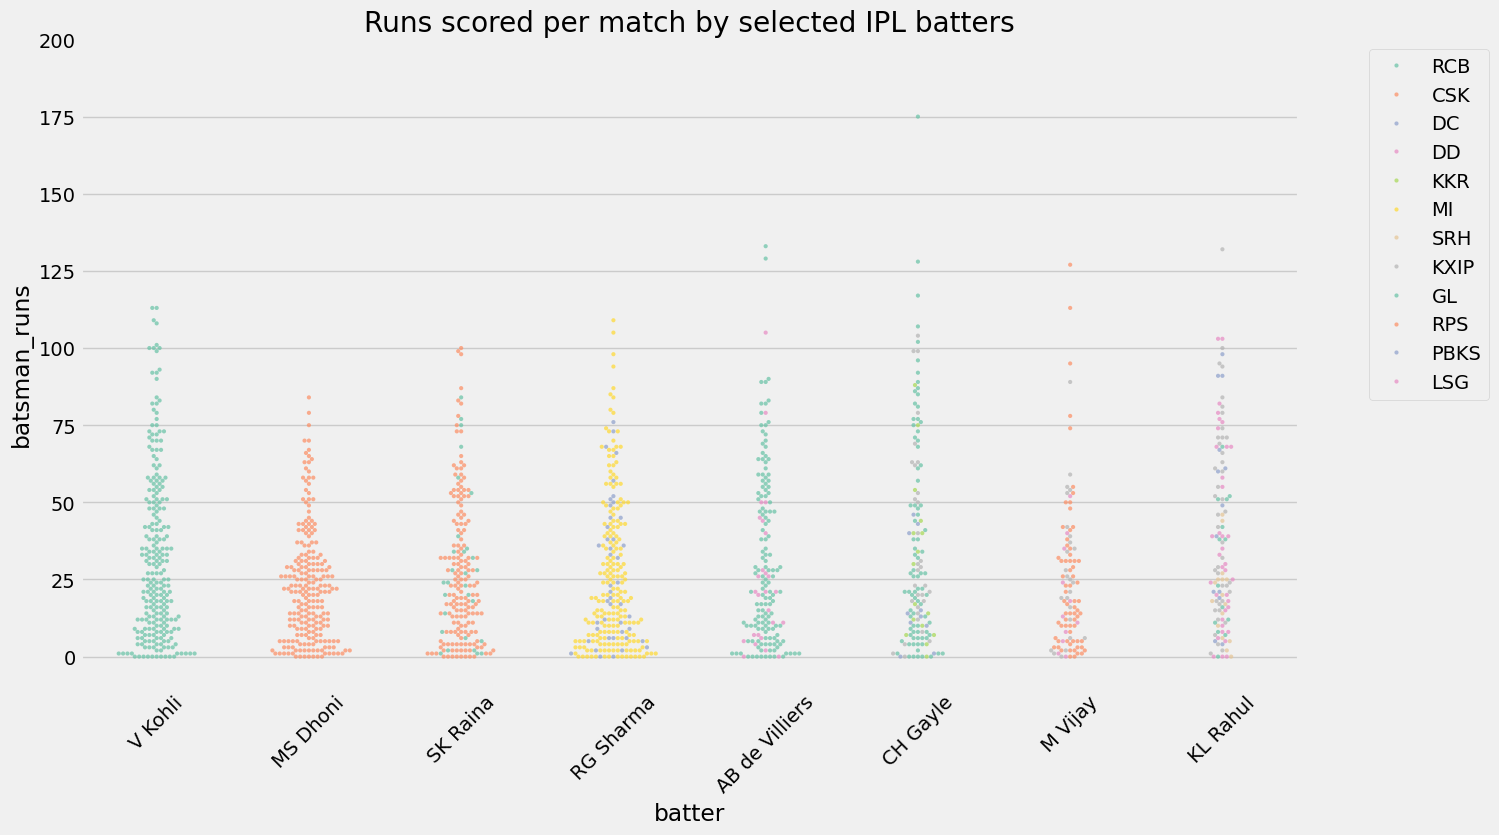

In [225]:
swarm = ['CH Gayle', 'AB de Villiers', 
         'KL Rahul', 'M Vijay', 
         'RG Sharma', 'V Kohli', 'MS Dhoni', 'SK Raina']

scores = delivery.groupby(['match_id', 'batter', 'batting_team'])['batsman_runs'].sum().reset_index()

scores = scores[scores['batter'].isin(swarm)]

mlt.figure(figsize=(14, 8))
sns.swarmplot(
    x='batter', 
    y='batsman_runs', 
    data=scores,
    hue='batting_team', 
    palette='Set2',
    size=3,        
    alpha=0.7     
)

mlt.ylim(-10, 200)
mlt.xticks(rotation=45)
mlt.title("Runs scored per match by selected IPL batters")
mlt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
mlt.show()


##### Runs Scored by Batsman Across Seasons

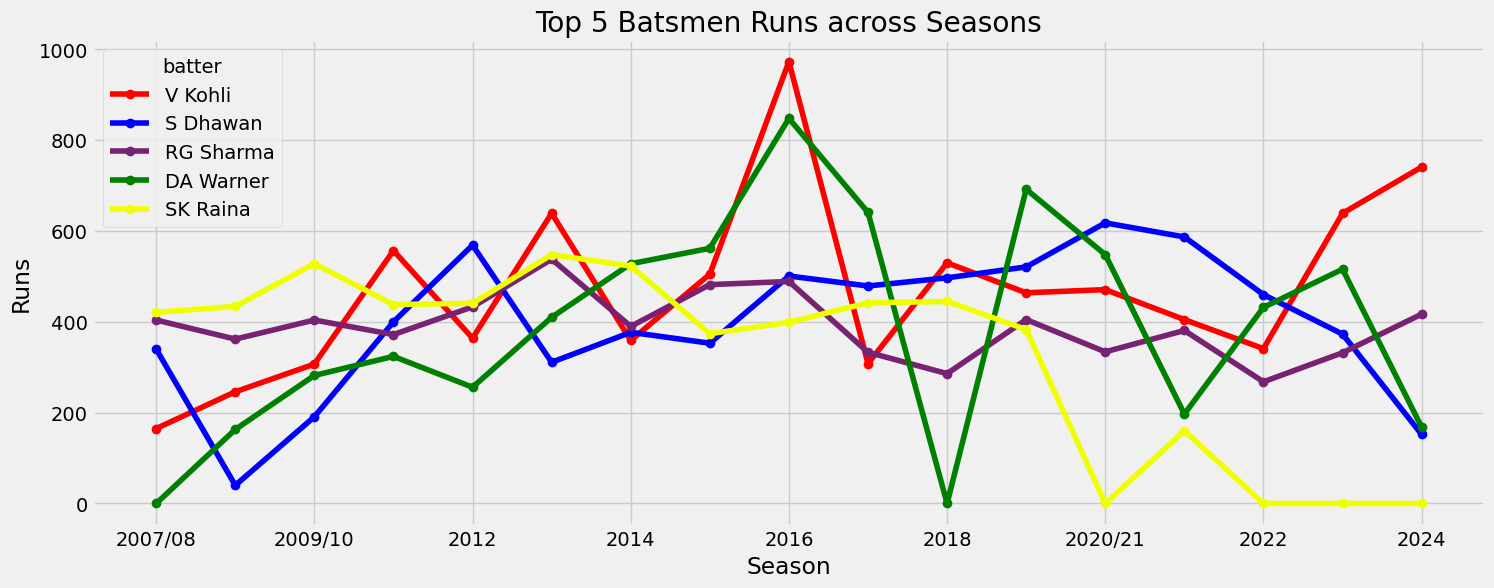

In [226]:
batsman = delivery.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

a = batsman.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

a = a.pivot(index='batter', columns='season', values='batsman_runs').fillna(0)

a['Total'] = a.sum(axis=1)

a = a.sort_values(by='Total', ascending=False).head(5)

a.drop('Total', axis=1, inplace=True)

a.T.plot(color=['red', 'blue', '#772272', 'green', '#f0ff00'], marker='o')
fig = mlt.gcf()
fig.set_size_inches(16, 6)
mlt.title("Top 5 Batsmen Runs across Seasons")
mlt.ylabel("Runs")
mlt.xlabel("Season")
mlt.show()


##### Frequeny of Scores

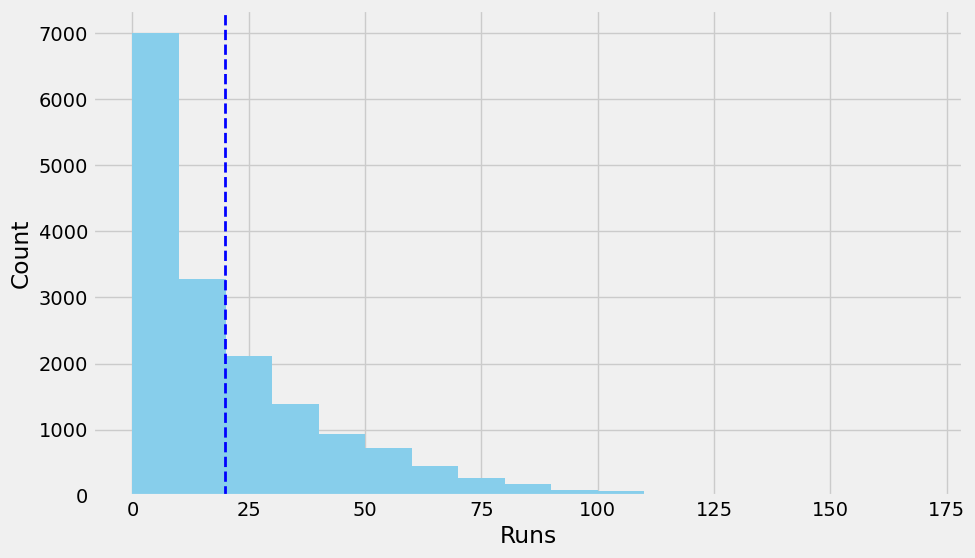

In [227]:
mlt.subplots(figsize = (10,6))

bins = range(0, 180, 10)

mlt.hist(top_scores['batsman_runs'], bins, histtype = 'bar', rwidth = 1.2, color = '#87CEEB')

mlt.xlabel('Runs')

mlt.ylabel('Count')

mlt.axvline(top_scores['batsman_runs'].mean(), color = 'b', linestyle = 'dashed', linewidth = 2)
mlt.plot()
mlt.show()

#### Orange Caps Each Season (Highest Run Getter Per Season)

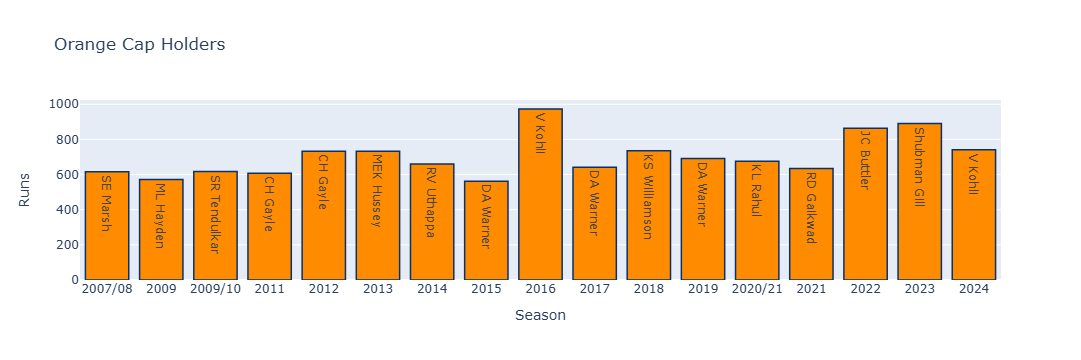

In [228]:
orange = matches[['id', 'season']]
orange = orange.merge(delivery, left_on='id', right_on='match_id', how='left')
orange = orange.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
orange = orange.sort_values('batsman_runs', ascending=False)
orange = orange.drop_duplicates(subset=['season'], keep="first")
orange = orange.sort_values(by='season')

trace1 = go.Bar(
    x=orange['season'].values,
    y=orange['batsman_runs'].values,
    name='Orange Cap Runs',
    text=orange['batter'].values,
    marker=dict(
        color='rgb(255, 140, 0)',
        line=dict(
            color='rgb(8, 48, 107)',
            width=1.5
        )
    ),
    opacity=1
)

layout = go.Layout(
    title="Orange Cap Holders",
    xaxis=dict(title="Season"),
    yaxis=dict(title="Runs")
)

fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig, filename='Stacked-bar')

#### Top Bowlers

#### Highest Wicket Taker

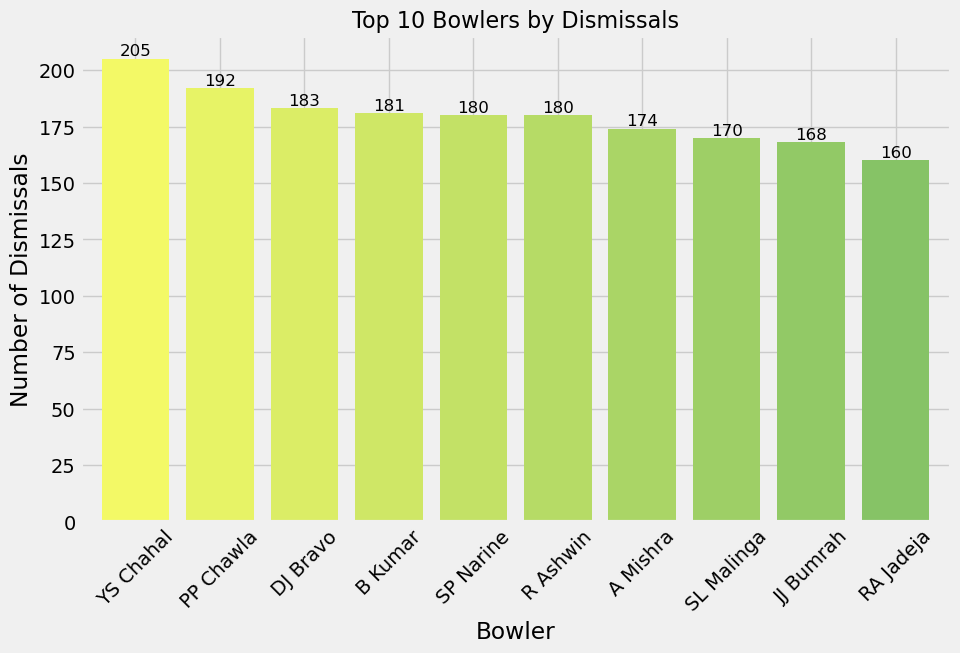

In [229]:
mlt.subplots(figsize=(10, 6))

dismissal_kinds = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
ct = delivery[delivery['dismissal_kind'].isin(dismissal_kinds)]

ax = ct['bowler'].value_counts()[:10].plot.bar(
    width=0.8, 
    color=sns.color_palette('summer_r', 20)
)

for p in ax.patches:
    ax.annotate(
        str(p.get_height()),                
    (p.get_x() + p.get_width() / 2,     
         p.get_height()),                   
        ha='center', va='bottom', fontsize=12
    )

mlt.title("Top 10 Bowlers by Dismissals", fontsize=16)
mlt.ylabel("Number of Dismissals")
mlt.xlabel("Bowler")
mlt.xticks(rotation=45)
mlt.show()


#### Maximum Overs

In [230]:
eco = delivery.groupby(['bowler']).sum(numeric_only = True)
eco['total balls'] = delivery['bowler'].value_counts()
eco['overs'] = (eco['total balls']//6)
eco[eco['overs'] > 200].sort_values(by = 'overs', ascending = 0)['overs'].head(5).reset_index()

,bowler,overs
0,R Ashwin,779
1,SP Narine,691
2,B Kumar,676
3,PP Chawla,649
4,RA Jadeja,649


In [231]:
eco['economy'] = (eco['total_runs'] / (eco['overs']))
eco[eco['overs']>300].sort_values('economy')[:10].economy.reset_index().T

,0,1,2,3,4,5,6,7,8,9
bowler,SP Narine,DW Steyn,Rashid Khan,R Ashwin,SL Malinga,Harbhajan Singh,JJ Bumrah,KH Pandya,AR Patel,A Mishra
economy,6.761216,6.797368,6.915114,6.976893,7.042424,7.046392,7.245283,7.283747,7.28381,7.304878


#### Top 20 Bowlers

In [234]:
bowlers = delivery.groupby('bowler').sum(numeric_only = True).reset_index()

In [235]:
bowl = delivery['bowler'].value_counts().reset_index()
bowl.columns = ['bowler', 'balls']
bowl['index'] = range(1, len(bowl) + 1)

bowl['bowler'] = bowl['bowler'].astype(str)
bowlers['bowler'] = bowlers['bowler'].astype(str)

bowlers = bowlers.merge(bowl, on='bowler', how='left')

bowlers = bowlers[['bowler', 'total_runs', 'balls']]

bowlers.rename({'total_runs': "runs_given"}, axis=1, inplace=True)

bowlers['overs'] = bowlers['balls'] // 6

dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct = delivery[delivery['dismissal_kind'].isin(dismissal_kinds)]
ct = ct['bowler'].value_counts()[:20].reset_index()
ct.columns = ['bowler', 'wickets']

bowlers = bowlers.merge(ct, on='bowler', how='left').dropna()

bowlers['economy'] = bowlers['runs_given'] / bowlers['overs']

bowlers.head()


,bowler,runs_given,balls,overs,wickets,economy
8,A Mishra,4193,3444,574,174.0,7.304878
42,AR Patel,3824,3152,525,123.0,7.283810
71,B Kumar,5051,4060,676,181.0,7.471893
119,DJ Bravo,4436,3296,549,183.0,8.080146
162,HV Patel,3215,2284,380,135.0,8.460526


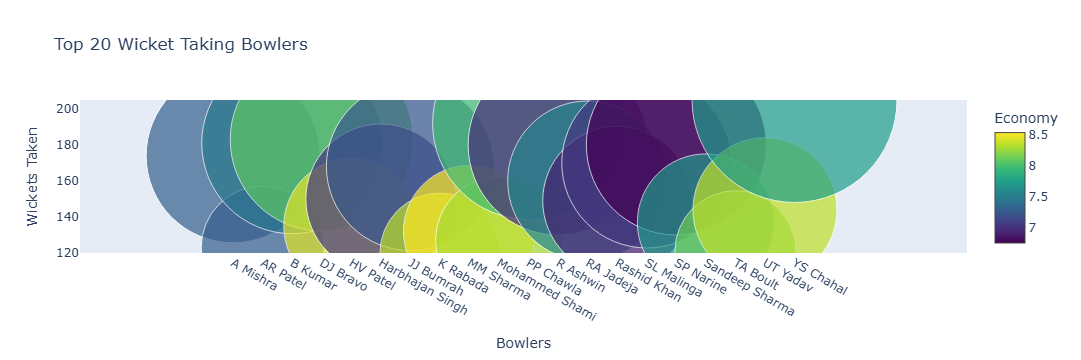

In [236]:
trace = go.Scatter(
    y = bowlers['wickets'],
    x = bowlers['bowler'],
    mode = 'markers',
    marker = dict(
        size = bowlers['wickets'].values,
        color = bowlers['economy'].values,
        colorscale = 'Viridis',
        showscale = True,
        colorbar = dict(title = 'Economy'),
    ),
    text = bowlers['overs'].values
)

data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Top 20 Wicket Taking Bowlers',
    hovermode = 'closest',
    xaxis = dict(
        showgrid = False,
        zeroline = False,
        showline = False,
        title = 'Bowlers'
    ),
    yaxis = dict(
        title = 'Wickets Taken',
        ticklen = 5,
        gridwidth = 2,
        showgrid = False,
        zeroline = False,
        showline = False
    ),
    showlegend = False
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatterChol')


#### Highest Dismissals For a Batsman by a Bowler

In [237]:
def get_top_bowler(batsman_name):
    batsman_data = delivery[delivery['batter'] == batsman_name]

    batsman_data = batsman_data[batsman_data['dismissal_kind'].isin(
        ['caught', 'lbw', 'bowled', 'stumped', 'caught and bowled', 'hit wicket']
    )]

    top_bowler = (
        batsman_data.groupby('bowler')['dismissal_kind']
        .count()
        .reset_index()
        .sort_values(by='dismissal_kind', ascending=False)
        .head(1)
    )

    top_bowler['batsman'] = batsman_name
    top_bowler.rename(columns={'dismissal_kind': 'No_of_Dismissals'}, inplace=True)
    return top_bowler[['batsman', 'bowler', 'No_of_Dismissals']]

In [238]:
batsmen = ['CH Gayle', 'V Kohli', 'SK Raina', 'AB de Villiers', 'MS Dhoni',
           'G Gambhir', 'RG Sharma', 'RV Uthappa', 'S Dhawan', 'DA Warner']

In [239]:
results = [get_top_bowler(batsman) for batsman in batsmen]

In [240]:
new = pd.concat(results, ignore_index=True)

styled_new = new.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
)

styled_new

,batsman,bowler,No_of_Dismissals
0,CH Gayle,R Ashwin,5
1,V Kohli,Sandeep Sharma,7
2,SK Raina,Harbhajan Singh,5
3,AB de Villiers,PP Chawla,4
4,MS Dhoni,Z Khan,7
5,G Gambhir,Z Khan,6
6,RG Sharma,SP Narine,8
7,RV Uthappa,R Ashwin,7
8,S Dhawan,Z Khan,4
9,DA Warner,UT Yadav,5


#### Purple Caps Each Season

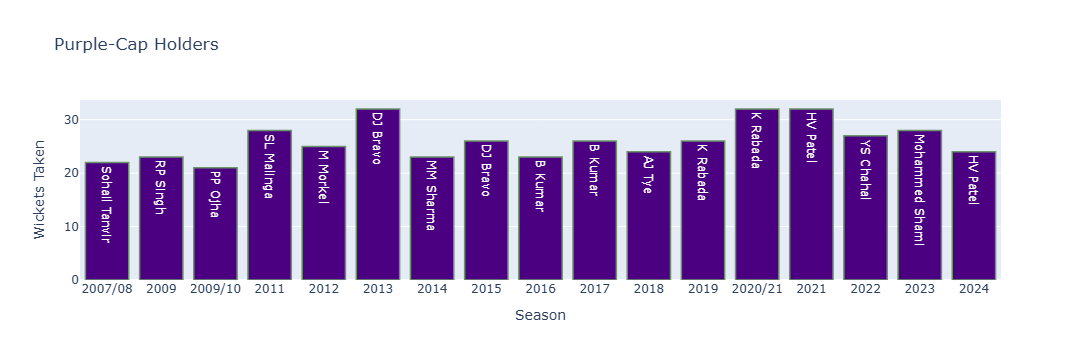

In [241]:
dismissal_kinds = ['caught', 'lbw', 'bowled', 'stumped', 'caught and bowled', 'hit wicket']

purple = delivery[delivery['dismissal_kind'].isin(dismissal_kinds)]

purple = purple.merge(matches, left_on='match_id', right_on='id', how='outer')

purple = purple.groupby(['season', 'bowler'])['dismissal_kind'].count().reset_index()

purple = purple.sort_values('dismissal_kind', ascending=False)

purple = purple.drop_duplicates('season', keep='first').sort_values(by='season')

purple.rename({'dismissal_kind': 'count_wickets'}, axis=1, inplace=True)

trace1 = go.Bar(
    x=purple['season'].values,
    y=purple['count_wickets'].values,
    name='Total Wickets',
    text=purple['bowler'].values,  
    marker=dict(
        color='rgb(75, 0, 130)',
        line=dict(
            color='rgb(108, 148, 107)',
            width=1.5
        )
    ),
    opacity=1
)

layout = go.Layout(
    title='Purple-Cap Holders',
    xaxis=dict(title='Season'),
    yaxis=dict(title='Wickets Taken')
)

fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig, filename='purple-cap-holders')
